# Training a Standard BDT in Python 

In [2]:
import pandas
import numpy
import sys
sys.path.append("../")
sys.path.append("../plotting/")
import pickle

import matplotlib.cm as cm
from sklearn.preprocessing import scale

from finalHistogramPlot import *
from sensitivity import *
from xgboost import XGBClassifier
from IPython.display import  display
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import time
import threading

%matplotlib inline

/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [4]:
_paths = {'2jet-even':'../CSV/VHbb_data_2jet_even.csv',
          '2jet-odd':'../CSV/VHbb_data_2jet_odd.csv',
        '3jet-even':'../CSV/VHbb_data_3jet_even.csv',
          '3jet-odd':'../CSV/VHbb_data_3jet_odd.csv'}

variables_2 = [ 'dRBB','mBB',
             'pTB1', 'pTB2', 'MET',
             'dPhiVBB','dPhiLBmin','Mtop',
             'dYWH', 'mTW', 'pTV', 'MV1cB1', 'MV1cB2',]

variables_3 = [ 'MV1cB1', 'MV1cB2', 'mBB', 'dRBB', 
             'pTB1', 'pTB2', 'MET', 'dPhiVBB', 'dPhiLBmin',
        'Mtop', 'dYWH', 'mTW', 'pTV', 'mBBJ', 'pTJ3', 'MV1cJ3']

var = {'2':variables_2,'3':variables_3}

scored_dfs = {}

def combined_sensitivty(x,y,err_x,err_y):
    sens = np.sqrt(x**2 + y**2)
    error = np.sqrt(((x*err_x)/np.sqrt(x**2 + y**2))**2 + ((y*err_y)/np.sqrt(x**2 + y**2))**2)
    
    return (sens,error)


#### Ada Boost

In [4]:
start = time.time()
for nJets in [2,3]:
    
    
    # Defining BDT Parameters and Input Variables
    if nJets ==2:
    
        variables = ['dRBB','mBB',
                     'pTB1', 'pTB2', 'MET',
                     'dPhiVBB','dPhiLBmin','Mtop',
                     'dYWH', 'mTW', 'pTV',]
        n_estimators = 200
        max_depth = 4
        learning_rate = 0.15

    else:
         
        variables = ['mBB', 'dRBB', 
             'pTB1', 'pTB2', 'MET', 'dPhiVBB', 'dPhiLBmin',
        'Mtop', 'dYWH', 'mTW', 'pTV', 'mBBJ', 'pTJ3']
        
        n_estimators = 300
        max_depth = 4
        learning_rate = 0.15
        
    # Reading Data
    df_k1_2= pd.read_csv(_paths[str(nJets)+'jet-even'])
    df_k2_2= pd.read_csv(_paths[str(nJets)+'jet-odd'])


    # Initialising Classifier
    bdt_even = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=0.01),
                                          learning_rate=learning_rate,
                                          algorithm="SAMME",
                                          n_estimators=n_estimators
                                          )

    bdt_odd = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=0.01),
                                         learning_rate=0.15,
                                         algorithm="SAMME",
                                         n_estimators=n_estimators
                                         )

    # Training
    print(str(nJets)+" Jet training...")
    
    bdt_even.fit(df_k1_2[variables], df_k1_2['Class'], sample_weight=df_k1_2['training_weight'])

    bdt_odd.fit(df_k2_2[variables], df_k2_2['Class'], sample_weight=df_k2_2['training_weight'])
    
    # Scoring
    df_k1_2['decision_value'] = bdt_odd.decision_function(df_k1_2[variables]).tolist()
    df_k2_2['decision_value'] = bdt_even.decision_function(df_k2_2[variables]).tolist()

    df = pd.concat([df_k1_2,df_k2_2])
    
    # Calculating Sensitivity
    if nJets ==2:
        result_2 = calc_sensitivity_with_error(df)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_2[0]) + " ± "+ str(result_2[1]))

    else:
        result_3 = calc_sensitivity_with_error(df)
        

        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_3[0]) + " ± "+ str(result_3[1]))

result_combined = combined_sensitivty(result_2[0],result_3[0],result_2[1],result_3[1])

print("Combined Sensitivity", result_combined[0], "±",result_combined[1])
print("Time Taken", time.time() - start)
    


2 Jet training...
3 Jet training...
3 Jet using the Standard BDT: 2.527121245494239 ± 0.0872923849644031
3 Jet using the Standard BDT: 1.4551627511357164 ± 0.032557946999315586
Combined Sensitivity 2.52862843255 ± 1.45429583681


## XGBoost

* Training a BDT using XGBoost algorithm.

training even...training odd...

TrafoD 21
21


/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


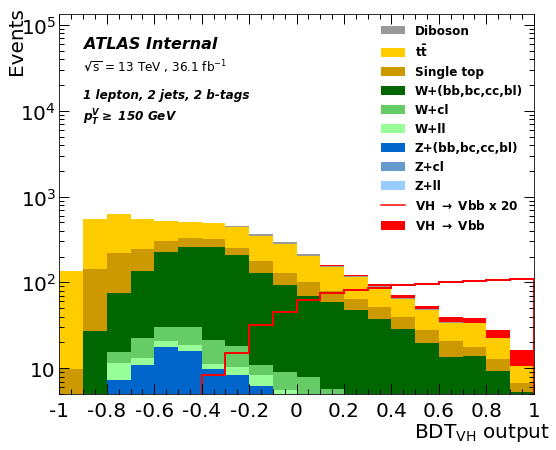

TrafoD 21
training even...training odd...

TrafoD 21
21


/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


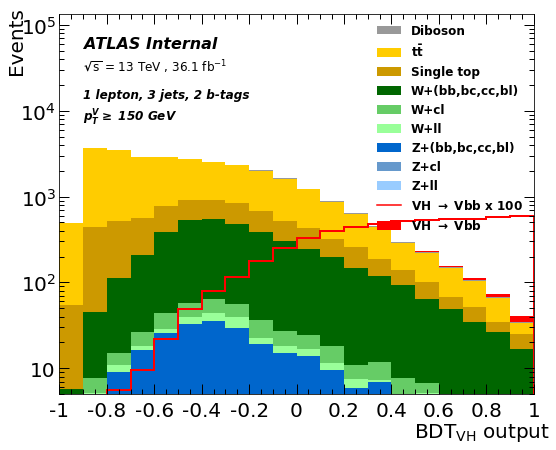

TrafoD 21


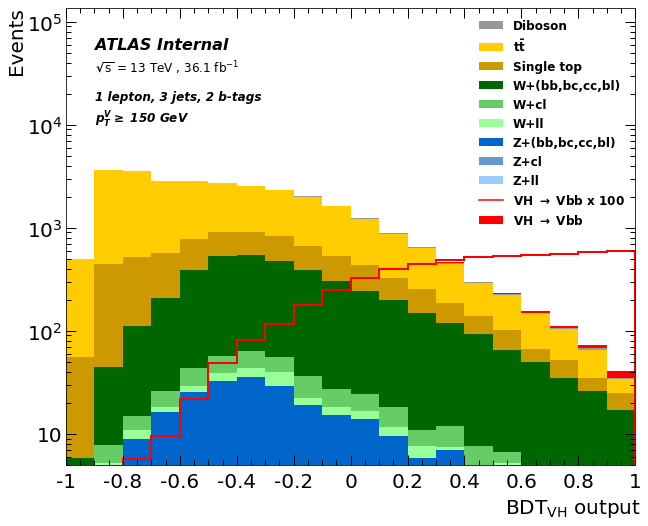

3 Jet using the Standard BDT: 2.575343053975723 ± 0.08719500275608487
3 Jet using the Standard BDT: 1.5248872293188949 ± 0.036996467755053525
Combined Sensitivity 2.99293717071 ± 0.0773605421287
Time Taken 87.93006491661072


In [7]:
start = time.time()
for nJets in [2,3]:
    
    # Defining BDT Parameters
    if nJets ==2:
        
        variables = ['dRBB','mBB',
                     'pTB1', 'pTB2', 'MET',
                     'dPhiVBB','dPhiLBmin','Mtop',
                     'dYWH', 'mTW', 'pTV',]
        n_estimators = 200
        max_depth = 4
        learning_rate = 0.05
        subsample = 0.5

    else:
         
        variables = ['mBB', 'dRBB', 
             'pTB1', 'pTB2', 'MET', 'dPhiVBB', 'dPhiLBmin',
        'Mtop', 'dYWH', 'mTW', 'pTV', 'mBBJ', 'pTJ3']
        
        n_estimators = 300
        max_depth = 4
        learning_rate = 0.05
        subsample = 0.5

    # Reading Data
    df_k1_2= pd.read_csv(_paths[str(nJets)+'jet-even'])
    df_k2_2= pd.read_csv(_paths[str(nJets)+'jet-odd'])

    
    # Initialising BDTs
    xgb_even = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)
    xgb_odd = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)


    # Training using threads
    def train_even():
        print("training even...")
        xgb_even.fit(df_k1_2[variables], df_k1_2['Class'], sample_weight=df_k1_2['training_weight'])
    def train_odd():
        print("training odd...")
        xgb_odd.fit(df_k2_2[variables], df_k2_2['Class'], sample_weight=df_k2_2['training_weight'])

    t = threading.Thread(target=train_even)
    t2 = threading.Thread(target=train_odd)

    t.start()
    t2.start()
    t.join()
    t2.join()
    
    # Scoring
    scores_even = xgb_odd.predict_proba(df_k1_2[variables])[:,1]
    scores_odd = xgb_even.predict_proba(df_k2_2[variables])[:,1]

    df_k1_2['decision_value'] = ((scores_even-0.5)*2)
    df_k2_2['decision_value'] = ((scores_odd-0.5)*2)
    df = pd.concat([df_k1_2,df_k2_2])
    h1,ax = final_decision_plot(df)
    
    # Calculating Sensitivity
    if nJets ==2:
        result_2 = calc_sensitivity_with_error(df)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_2[0]) + " ± "+ str(result_2[1]))

    else:
        result_3 = calc_sensitivity_with_error(df)
        h1.set_size_inches(8.5*1.2,7*1.2)
        display(h1)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_3[0]) + " ± "+ str(result_3[1]))

    
    
result_combined = combined_sensitivty(result_2[0],result_3[0],result_2[1],result_3[1])

print("Combined Sensitivity", result_combined[0], "±",result_combined[1])
print("Time Taken", time.time() - start)


## Adding Binned *b*-tagging



training even...
training odd...
TrafoD 21
21


/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3449: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '
/Users/ishankhurana/anaconda3/lib/python3.6/site-packages/matplotlib/text.py:2096: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  warnings.warn("You have used the `textcoords` kwarg, but not "


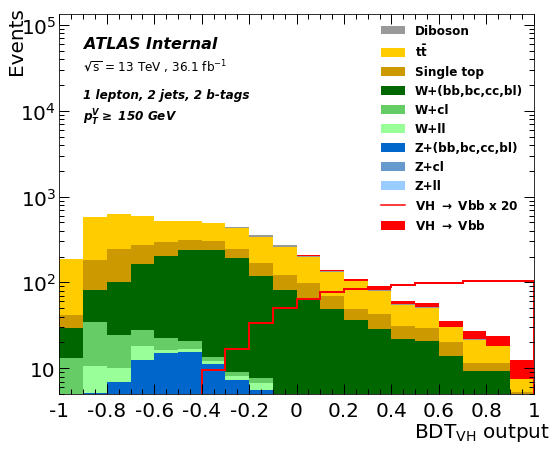

TrafoD 21
2 Jet using the Standard BDT: 2.826266767304154 ± 0.13977473183510372
Combined Sensitivity 3.2113960986 ± 0.124260183745
Time Taken 32350.10905790329


In [8]:
for nJets in [2]:
    
    # Defining BDT parameters 
    if nJets ==2:
        
        variables = [ 'dRBB','mBB',
                     'pTB1', 'pTB2', 'MET',
                     'dPhiVBB','dPhiLBmin','Mtop',
                     'dYWH', 'mTW', 'pTV', 'MV1cB1', 'MV1cB2',]
        n_estimators = 280
        max_depth = 5
        learning_rate = 0.05
        subsample  = 0.5

    else:
         
        variables = ['MV1cB1', 'MV1cB2', 'mBB', 'dRBB', 
                     'pTB1', 'pTB2', 'MET', 'dPhiVBB', 'dPhiLBmin',
                'Mtop', 'dYWH', 'mTW', 'pTV', 'mBBJ', 'pTJ3', 'MV1cJ3']
        
        n_estimators = 350
        max_depth = 5
        learning_rate = 0.05
        subsample  = 0.5
        
    # Reading Data
    df_k1_2= pd.read_csv(_paths[str(nJets)+'jet-even'])
    df_k2_2= pd.read_csv(_paths[str(nJets)+'jet-odd'])

    
    # Initialising BDTs
    xgb_even = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)
    xgb_odd = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)

    
    # Training
    def train_even():
        print("training even...")
        xgb_even.fit(df_k1_2[variables], df_k1_2['Class'], sample_weight=df_k1_2['training_weight'])
    def train_odd():
        print("training odd...")
        xgb_odd.fit(df_k2_2[variables], df_k2_2['Class'], sample_weight=df_k2_2['training_weight'])

    t = threading.Thread(target=train_even)
    t2 = threading.Thread(target=train_odd)

    t.start()
    t2.start()
    t.join()
    t2.join()

    # Scoring
    scores_even = xgb_odd.predict_proba(df_k1_2[variables])[:,1]
    scores_odd = xgb_even.predict_proba(df_k2_2[variables])[:,1]

    df_k1_2['decision_value'] = ((scores_even-0.5)*2)
    df_k2_2['decision_value'] = ((scores_odd-0.5)*2)
    df = pd.concat([df_k1_2,df_k2_2])
    h1,ax = final_decision_plot(df)
    
    # Calculating sensitivity
    if nJets ==2:
        result_2 = calc_sensitivity_with_error(df)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_2[0]) + " ± "+ str(result_2[1]))

    else:
        result_3 = calc_sensitivity_with_error(df)
        h1.set_size_inches(8.5*1.2,7*1.2)
        display(h1)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_3[0]) + " ± "+ str(result_3[1]))

    
    
result_combined = combined_sensitivty(result_2[0],result_3[0],result_2[1],result_3[1])

print("Combined Sensitivity", result_combined[0], "±",result_combined[1])
print("Time Taken", time.time() - start)


## Adding Continuous b-tagging Output 

Repeating using continuous *b*-tagging output.

In [68]:
for nJets in [2,3]:
    
    if nJets ==2:
    
        variables = [ 'dRBB','mBB',
                     'pTB1', 'pTB2', 'MET',
                     'dPhiVBB','dPhiLBmin','Mtop',
                     'dYWH', 'mTW', 'pTV', 'MV1cB1_cont', 'MV1cB2_cont',]
        n_estimators = 300
        max_depth = 6
        learning_rate = 0.05

    else:
         
        variables = ['MV1cB1_cont', 'MV1cB2_cont', 'mBB', 'dRBB', 
                     'pTB1', 'pTB2', 'MET', 'dPhiVBB', 'dPhiLBmin',
                'Mtop', 'dYWH', 'mTW', 'pTV', 'mBBJ', 'pTJ3', 'MV1cJ3_cont']
        
        n_estimators = 300
        max_depth = 6
        learning_rate = 0.05
        

    df_k1_2= pd.read_csv(_paths[str(nJets)+'jet-even'])
    df_k2_2= pd.read_csv(_paths[str(nJets)+'jet-odd'])


    xgb_even = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)
    xgb_odd = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)



    print("training...")
    xgb_even.fit(df_k1_2[variables], df_k1_2['Class'], sample_weight=df_k1_2['training_weight'])

    xgb_odd.fit(df_k2_2[variables], df_k2_2['Class'], sample_weight=df_k2_2['training_weight'])


    scores_even = xgb_odd.predict_proba(df_k1_2[variables])[:,1]
    scores_odd = xgb_even.predict_proba(df_k2_2[variables])[:,1]

    df_k1_2['decision_value'] = ((scores_even-0.5)*2)
    df_k2_2['decision_value'] = ((scores_odd-0.5)*2)
    df = pd.concat([df_k1_2,df_k2_2])
    h1,ax = final_decision_plot(df)
    if nJets ==2:
        result_2 = calc_sensitivity_with_error(df)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_2[0]) + " ± "+ str(result_2[1]))

    else:
        result_3 = calc_sensitivity_with_error(df)
        h1.set_size_inches(8.5*1.2,7*1.2)
        display(h1)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_3[0]) + " ± "+ str(result_3[1]))

    
    
result_combined = combined_sensitivty(result_2[0],result_3[0],result_2[1],result_3[1])

print("Combined Sensitivity", result_combined[0], "±",result_combined[1])
print("Time Taken", time.time() - start)


training...
Using the Standard BDT: 2.965292536005919 ± 0.12603192168587402
Writing...


# Adding Number of Track Jets

In [74]:
for nJets in [2,3]:
    
    if nJets == 2:
    
        variables = [ 'nTrackJetsOR','dRBB','mBB',
                     'pTB1', 'pTB2', 'MET',
                     'dPhiVBB','dPhiLBmin','Mtop',
                     'dYWH', 'mTW', 'pTV', 'MV1cB1_cont', 'MV1cB2_cont',]
        n_estimators = 290
        max_depth = 5
        learning_rate = 0.05

    else:
         
        variables = ['nTrackJetsOR','MV1cB1_cont', 'MV1cB2_cont', 'mBB', 'dRBB', 
                     'pTB1', 'pTB2', 'MET', 'dPhiVBB', 'dPhiLBmin',
                'Mtop', 'dYWH', 'mTW', 'pTV', 'mBBJ', 'pTJ3', 'MV1cJ3_cont']
        
        n_estimators = 300
        max_depth = 6
        learning_rate = 0.05
        

    df_k1_2= pd.read_csv(_paths[str(nJets)+'jet-even'])
    df_k2_2= pd.read_csv(_paths[str(nJets)+'jet-odd'])


    xgb_even = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)
    xgb_odd = XGBClassifier(n_estimators=n_estimators, 
                             max_depth=max_depth, 
                             learning_rate=learning_rate,
                             subsample=subsample)



    print("training...")
    xgb_even.fit(df_k1_2[variables], df_k1_2['Class'], sample_weight=df_k1_2['training_weight'])

    xgb_odd.fit(df_k2_2[variables], df_k2_2['Class'], sample_weight=df_k2_2['training_weight'])


    scores_even = xgb_odd.predict_proba(df_k1_2[variables])[:,1]
    scores_odd = xgb_even.predict_proba(df_k2_2[variables])[:,1]

    df_k1_2['decision_value'] = ((scores_even-0.5)*2)
    df_k2_2['decision_value'] = ((scores_odd-0.5)*2)
    df = pd.concat([df_k1_2,df_k2_2])
    h1,ax = final_decision_plot(df)
    if nJets ==2:
        result_2 = calc_sensitivity_with_error(df)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_2[0]) + " ± "+ str(result_2[1]))

    else:
        result_3 = calc_sensitivity_with_error(df)
        h1.set_size_inches(8.5*1.2,7*1.2)
        display(h1)
        print(str(nJets) + " Jet using the Standard BDT: "+ str(result_3[0]) + " ± "+ str(result_3[1]))

    
    
result_combined = combined_sensitivty(result_2[0],result_3[0],result_2[1],result_3[1])

print("Combined Sensitivity", result_combined[0], "±",result_combined[1])
print("Time Taken", time.time() - start)


training...
Using the Standard BDT: 2.9564169746658995 ± 0.11159783196232756
Writing...


# Hyper Param Optimisation 

### Matplotlib Heat Maps 

((190, 8), (1.7898865614068586, 0.056816453485564654))
((200, 5), (2.9112535017508416, 0.13027169651005835))


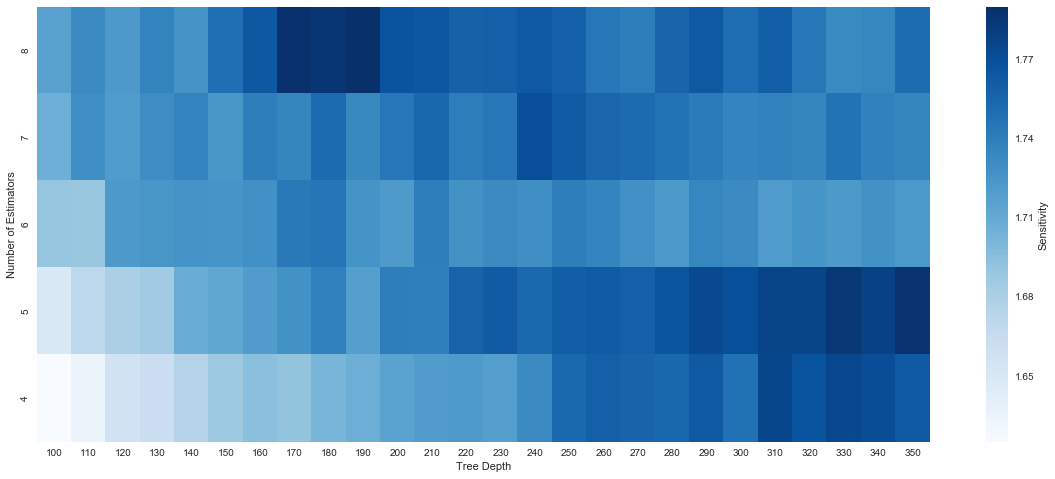

In [49]:
from pickle_functions import *
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# opt_3 = loadResultsFromFile('results/3jet_all_optimisation.pkl')
# opt_2 = loadResultsFromFile('results/2jet_all_optimisation.pkl')


# opt_3 = loadResultsFromFile('results/3jet_bcont_optimisation.pkl')
# opt_2 = loadResultsFromFile('results/2jet_bcont_optimisation.pkl') 

opt_3 = loadResultsFromFile('results/binned_b_new/3jet_binned_b_optimisation.pkl')
opt_2 = loadResultsFromFile('results/binned_b_new/2jet_binned_b_optimisation.pkl') 



opt_3 = loadResultsFromFile('results/3jet_binned_b_optimisation.pkl')
opt_2 = loadResultsFromFile('results/2jet_binned_b_optimisation.pkl') 



print(max(opt_3.items(), key=operator.itemgetter(1)))
print(max(opt_2.items(), key=operator.itemgetter(1)))

nJets = 3


rows = []

for depth in [4,5,6,7,8]:
    if nJets == 2:
        r = [opt_2[(n_est,depth)][0] for n_est in np.arange(100,360,10)]
    if nJets == 3:
        r = [opt_3[(n_est,depth)][0] for n_est in np.arange(100,360,10)]

    rows.append(r)
    
hmap = numpy.matrix(rows)
hmap = np.transpose(hmap)
df = pd.DataFrame(hmap)
df = df.rename(index=str, columns={0: "4", 1: "5",2: "6", 3: "7",4: "8"})
df = df.set_index(np.arange(100,360,10))

fig, ax = plt.subplots()
fig.set_size_inches(20,8)
df = df.T
if nJets == 2:
    sns.heatmap(df,ax = ax, cmap="Oranges",cbar_kws={'label': 'Sensitivity'})
else:
    sns.heatmap(df,ax = ax, cmap="Blues",cbar_kws={'label': 'Sensitivity'})
ax.invert_yaxis()
# ax.set_xticks(np.arange(100,360,10),np.arange(100,360,10))
ax.set(xlabel='Tree Depth', ylabel='Number of Estimators')

# plt.savefig('heat-maps/'+str(nJets)+'jet_binned_heatmap_sb.png', bbox_inches='tight',dpi = 100)
plt.show()

In [53]:
opt_3 = loadResultsFromFile('results/3jet_binned_b_optimisation.pkl')

for key in opt_3:
    if opt_3[key][0]> 1.78:
        print (key,opt_3[key])

(180, 8) (1.786652261739826, 0.057882091685968064)
(350, 5) (1.7873776591589794, 0.05796892482219337)
(330, 5) (1.7848763346461352, 0.05803808081206076)
(170, 8) (1.7890788551668175, 0.05688505601673356)
(190, 8) (1.7898865614068586, 0.056816453485564654)
